In [1]:
%matplotlib inline
import prospect as ssim

import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

## `Survey`

In [2]:
survey = ssim.Survey(name='demo_survey')

## `Area`

### From shapefile

In [3]:
shapefile_path = '../tests/test_data/shapefiles/areas/leiap_field1.shp'
area_from_shp = ssim.Area.from_shapefile(name='demo_area_from_shp', survey_name='demo_survey', path=shapefile_path, vis=0.9)

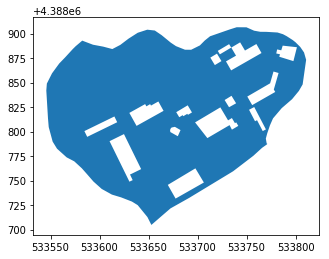

In [4]:
area_from_shp.df.plot();

## Layer

### From shapefile

In [5]:
layer_shp_path = '../tests/test_data/shapefiles/layers/leiap_field1_points.shp'
layer_from_shp = ssim.Layer.from_shapefile(path=layer_shp_path, name='demo_layer_from_shp', area=area_from_shp, 
                          assemblage_name='demo_assemblage', time_penalty=0.1, ideal_obs_rate=1.0)

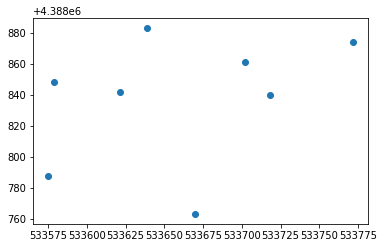

In [6]:
layer_from_shp.df.plot();

### From Poisson point process

In [7]:
poisson_rate = 0.01
layer_from_poisson = ssim.Layer.from_poisson_points(rate=poisson_rate, name='demo_poisson_layer', area=area_from_shp,
                                                    assemblage_name='demo_assemblage', time_penalty=0.2, ideal_obs_rate=0.95)

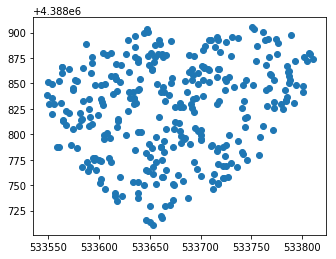

In [8]:
layer_from_poisson.df.plot();

### From Thomas point process

In [9]:
parent_rate = 0.01
child_rate = 0.1
gauss = 10.0
layer_from_thomas = ssim.Layer.from_thomas_points(parent_rate=parent_rate, child_rate=child_rate, gauss_var = gauss,
                                                  name='demo_thomas_layer', area=area_from_shp, 
                                                  assemblage_name='demo_assemblage', time_penalty=0.15, ideal_obs_rate=1.0)

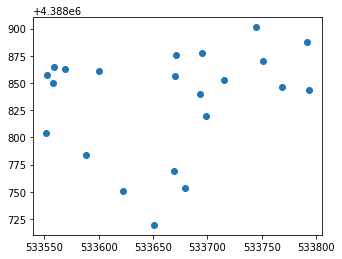

In [10]:
layer_from_thomas.df.plot();

### From Matern point process

In [11]:
parent_rate = 0.01
child_rate = 0.1
radius = 10.0
layer_from_matern = ssim.Layer.from_matern_points(parent_rate=parent_rate, child_rate=child_rate, radius = radius,
                                                  name='demo_matern_layer', area=area_from_shp, 
                                                  assemblage_name='demo_assemblage', time_penalty=0.15, ideal_obs_rate=1.0)

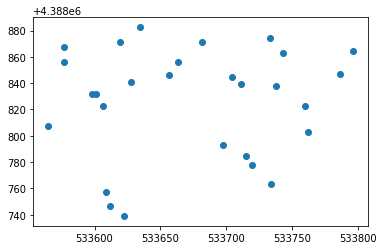

In [12]:
layer_from_matern.df.plot();

## `Assemblage`

In [13]:
assemblage = ssim.Assemblage(name='demo_assemblage', survey_name='demo_survey', area_name='demo_area_from_shp', 
                             layer_list=[layer_from_shp, layer_from_poisson, layer_from_thomas, layer_from_matern])

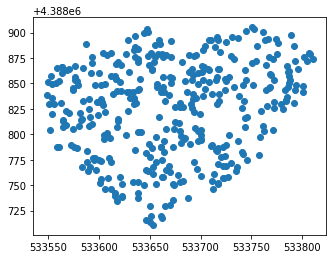

In [14]:
assemblage.df.plot();

## `Coverage`

### From transects

In [15]:
coverage_transects = ssim.Coverage.from_transects(name='demo_coverage_from_transects', area=area_from_shp, 
                                                  survey_name='demo_survey', spacing=10.0, sweep_width=2.0, orientation=0.0,
                                                  optimize_orient_by='area_coverage', orient_increment=4.0, orient_axis='short',
                                                  min_time_per_unit=5.0)

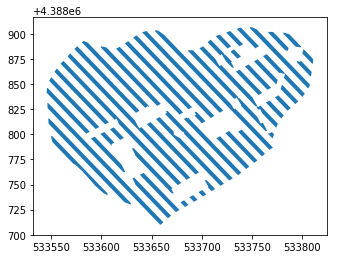

In [16]:
coverage_transects.df.plot();

## `Surveyor`

### Experts

In [17]:
expert = ssim.Surveyor(name='demo_expert', team_name='demo_team', surveyor_type='expert_person', skill=1.0, speed_penalty=0.0)

### Mid-level

In [18]:
mid1 = ssim.Surveyor(name='demo_mid1', team_name='demo_team', surveyor_type='mid_level_person', skill=0.9, speed_penalty=0.1)
mid2 = ssim.Surveyor(name='demo_mid2', team_name='demo_team', surveyor_type='mid_level_person', skill=0.8, speed_penalty=0.1)

### Novices

In [19]:
novice1 = ssim.Surveyor(name='demo_novice1', team_name='demo_team', surveyor_type='novice_person', skill=0.75, speed_penalty=0.2)
novice2 = ssim.Surveyor(name='demo_novice2', team_name='demo_team', surveyor_type='novice_person', skill=0.75, speed_penalty=0.2)
novice3 = ssim.Surveyor(name='demo_novice3', team_name='demo_team', surveyor_type='novice_person', skill=0.70, speed_penalty=0.25)

## `Team`

In [20]:
team_list = [expert, mid1, mid2, novice1, novice2, novice3]
team = ssim.Team(name='demo_team', survey_name='demo_survey', surveyor_list=team_list)

In [21]:
team.df

,skill,speed_penalty,surveyor_name,surveyor_type,team_name
0,1.00,0.00,demo_expert,expert_person,demo_team
1,0.90,0.10,demo_mid1,mid_level_person,demo_team
2,0.80,0.10,demo_mid2,mid_level_person,demo_team
3,0.75,0.20,demo_novice1,novice_person,demo_team
4,0.75,0.20,demo_novice2,novice_person,demo_team
5,0.70,0.25,demo_novice3,novice_person,demo_team


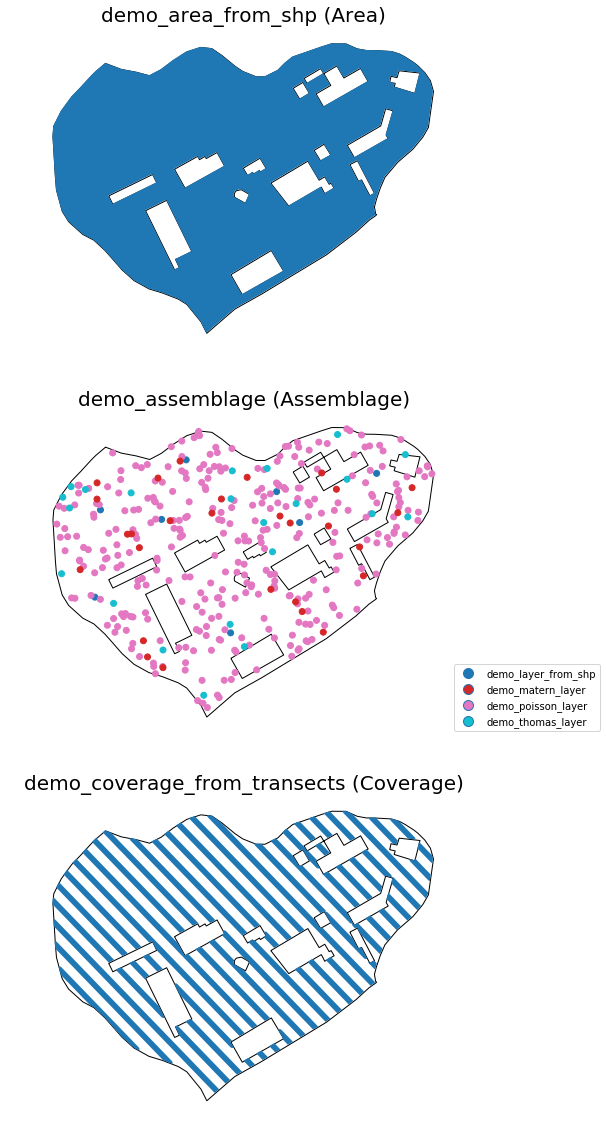

In [22]:
from prospect.plotting import bb_plot

bb_plot(area_from_shp, assemblage, coverage_transects, figsize=(12,20))

In [23]:
survey.add_bb(block=area_from_shp)

In [24]:
survey.add_bb(block=team)

In [25]:
survey.area

Area(name='demo_area_from_shp', survey_name='demo_survey', shape=<shapely.geometry.polygon.Polygon object at 0x1196df438>, vis=0.9)

In [26]:
survey.assemblage = assemblage

In [27]:
survey.assemblage

In [28]:
survey.team